In [2]:
pip install rembg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
pip install joblib


In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from rembg import remove
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

dataset = 'dataset-sampah3'
kategori = ['besi', 'kertas atau kardus', 'plastik']
label = {kategori: idx for idx, kategori in enumerate(kategori)}

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.



Gambar acak dari besi:


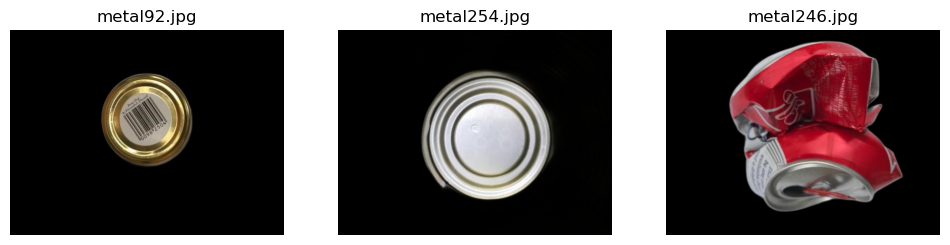


Gambar acak dari kertas atau kardus:


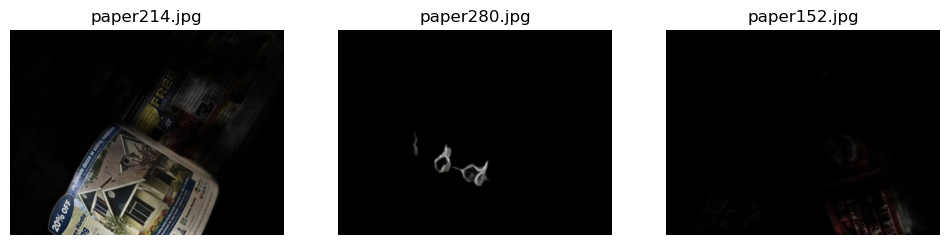


Gambar acak dari plastik:


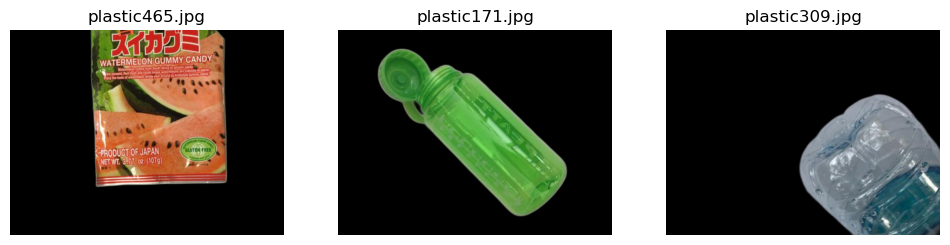

In [2]:
import os
import random
import matplotlib.pyplot as plt

def tampilkan_gambar_acak(kategori, num_images_per_category=3):
    """
    Fungsi untuk menampilkan gambar acak dari kategori yang diberikan.
    
    Parameter:
    - kategori: list dari nama kategori
    - num_images_per_category: jumlah gambar yang akan ditampilkan per kategori (default: 3)
    """

    for kategori_item in kategori:
        # Loop melalui setiap kategori dalam list kategori

        category_path = os.path.join(dataset, kategori_item)
        # Membuat path ke folder kategori dengan menggabungkan path dataset dan nama kategori

        image_files = os.listdir(category_path)
        # Mendapatkan daftar semua file gambar dalam folder kategori

        random_images = random.sample(image_files, num_images_per_category)
        # Memilih sejumlah gambar acak dari daftar file gambar

        print(f"\nGambar acak dari {kategori_item}:")
        # Mencetak nama kategori yang sedang diproses

        plt.figure(figsize=(num_images_per_category * 4, 4))
        # Membuat figure baru untuk menampilkan gambar, dengan ukuran sesuai dengan jumlah gambar yang ditampilkan

        for i, image_file in enumerate(random_images):
            # Loop melalui setiap gambar acak yang dipilih

            image_path = os.path.join(category_path, image_file)
            # Membuat path lengkap ke file gambar

            image = plt.imread(image_path)
            # Membaca gambar dari file

            plt.subplot(1, num_images_per_category, i+1)
            # Menambahkan subplot pada figure, dengan posisi yang sesuai

            plt.imshow(image)
            # Menampilkan gambar pada subplot

            plt.title(image_file)
            # Memberikan judul pada subplot dengan nama file gambar

            plt.axis('off')
            # Mematikan axis pada subplot untuk tampilan yang lebih bersih

        plt.show()
        # Menampilkan figure dengan semua subplot


In [3]:
# Fungsi untuk mendapatkan label (indeks kelas) dari nama folder
def dapatkan_label(categories):
    labels = {}  # Membuat kamus kosong untuk menyimpan kategori dan indeksnya
    for i, category in enumerate(categories):  # Iterasi melalui daftar kategori
        labels[category] = i  # Menyimpan indeks kategori dalam kamus
    return labels  # Mengembalikan kamus yang berisi kategori dan indeksnya

# Dapatkan label untuk setiap kelas
labels = dapatkan_label(kategori)  # Memanggil fungsi untuk mendapatkan label dari daftar kategori

# Fungsi untuk mendapatkan label dan path file untuk semua gambar
def dapatkan_label_dan_path(dataset, labels):
    X, y = [], []  # Membuat daftar kosong untuk menyimpan path file gambar (X) dan label (y)
    for category, label in labels.items():  # Iterasi melalui kamus label
        category_path = os.path.join(dataset, category)  # Mendapatkan path ke direktori kategori
        if os.path.isdir(category_path):  # Memeriksa apakah itu adalah direktori
            image_files = os.listdir(category_path)  # Mendapatkan daftar file dalam direktori
            for image_file in image_files:  # Iterasi melalui daftar file
                image_path = os.path.join(category_path, image_file)  # Mendapatkan path lengkap ke file gambar
                X.append(image_path)  # Menambahkan path gambar ke daftar X
                y.append(label)  # Menambahkan label ke daftar y
    return X, y  # Mengembalikan daftar path gambar (X) dan label (y)

X, y = dapatkan_label_dan_path(dataset, labels)  # Memanggil fungsi untuk mendapatkan path gambar dan label


In [4]:
# Tampilkan mapping deskripsi mengenai label kelas yang telah diencode
print("\nMapping deskripsi label kelas:")
for category, label in labels.items():  # Iterasi melalui kamus label
    print(f"{label}: {category}")  # Menampilkan indeks dan deskripsi kelas



Mapping deskripsi label kelas:
0: besi
1: kertas atau kardus
2: plastik


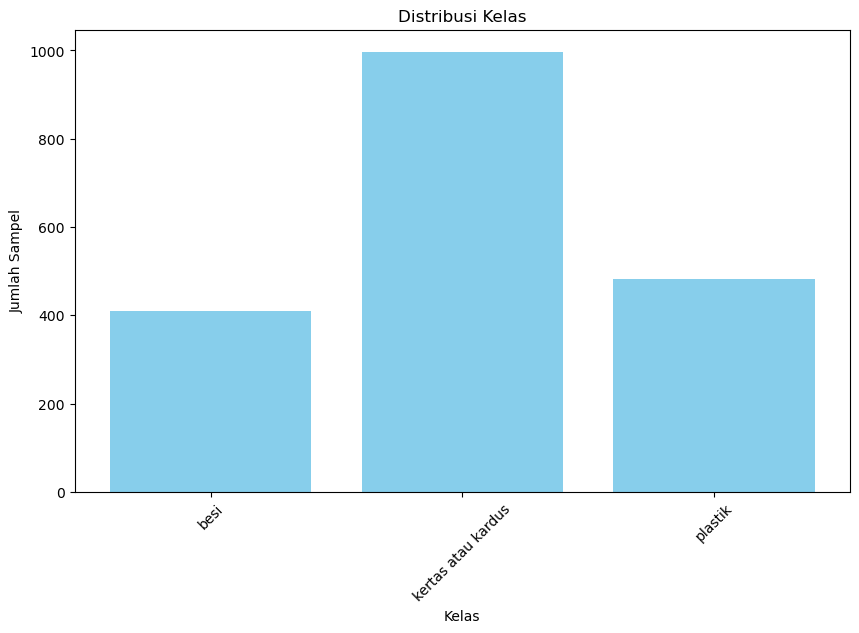

In [5]:
def tampilkan_distribusi_kelas(y, categories):
    class_counts = np.bincount(y)  # Menghitung jumlah sampel untuk setiap kelas
    plt.figure(figsize=(10, 6))  # Membuat gambar berukuran 10x6 inci
    plt.bar(categories, class_counts, color='skyblue')  # Membuat diagram batang dengan kategori sebagai sumbu x dan jumlah sampel sebagai sumbu y
    plt.title('Distribusi Kelas')  # Menambahkan judul diagram
    plt.xlabel('Kelas')  # Memberi label sumbu x
    plt.ylabel('Jumlah Sampel')  # Memberi label sumbu y
    plt.xticks(rotation=45)  # Memutar label sumbu x sebesar 45 derajat untuk memudahkan pembacaan
    plt.show()  # Menampilkan diagram

tampilkan_distribusi_kelas(y, kategori)  # Memanggil fungsi untuk menampilkan distribusi kelas


In [27]:
import os  # Modul untuk interaksi dengan sistem operasi
import cv2  # Modul untuk pemrosesan gambar menggunakan OpenCV
from collections import defaultdict  # Modul untuk membuat kamus dengan nilai default

ukuran_gambar = defaultdict(int)  # Membuat kamus dengan nilai default integer

def dapatkan_ukuran_gambar(dataset):
    for category in os.listdir(dataset):  # Iterasi melalui setiap kategori dalam dataset
        category_path = os.path.join(dataset, category)  # Mendapatkan path ke direktori kategori
        if os.path.isdir(category_path):  # Memeriksa apakah itu adalah direktori
            for image_file in os.listdir(category_path):  # Iterasi melalui setiap file gambar dalam direktori kategori
                image_path = os.path.join(category_path, image_file)  # Mendapatkan path lengkap ke file gambar
                image = cv2.imread(image_path)  # Membaca gambar menggunakan OpenCV
                if image is not None:  # Memastikan gambar terbaca dengan baik
                    height, width, _ = image.shape  # Mendapatkan dimensi gambar (tinggi, lebar, dan saluran warna)
                    size_str = f'{width}x{height}'  # Membuat string berisi dimensi gambar
                    ukuran_gambar[size_str] += 1  # Menambahkan jumlah gambar dengan ukuran tertentu ke kamus
    return ukuran_gambar  # Mengembalikan kamus yang berisi jumlah gambar untuk setiap ukuran

dataset = 'dataset-sampah3'  # Mendefinisikan direktori dataset

ukuran_gambar = dapatkan_ukuran_gambar(dataset)  # Memanggil fungsi untuk mendapatkan jumlah gambar untuk setiap ukuran

for size, count in ukuran_gambar.items():  # Iterasi melalui setiap item dalam kamus ukuran_gambar
    print(f'Ukuran: {size}, Jumlah: {count}')  # Mencetak ukuran gambar dan jumlahnya

total_data = sum(ukuran_gambar.values())  # Menghitung total jumlah data dalam dataset
print(f'Total jumlah data: {total_data}')  # Mencetak total jumlah data dalam dataset


Ukuran: 512x384, Jumlah: 1889
Total jumlah data: 1889


In [6]:
def preprocess_image(image_path):
    try:
        # Load image
        image = cv2.imread(image_path)  # Membaca gambar dari path yang diberikan
        
        # Mengecek apakah gambar terbaca dengan baik
        if image is None:
            raise ValueError(f"Image not found or unable to load: {image_path}")  # Memunculkan error jika gambar tidak ditemukan
        
        # Normalisasi gambar (rescale nilai piksel ke rentang [0, 1])
        normalized_image = image / 255.0  # Membagi nilai piksel dengan 255 untuk mendapatkan nilai antara 0 dan 1
        
        # Deteksi tepi menggunakan Canny Edge Detection pada saluran grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Mengubah gambar ke skala abu-abu
        edges = cv2.Canny(gray, 100, 200)  # Mendeteksi tepi menggunakan metode Canny
        
        # Konversi gambar tepi ke format RGB dan atur warna tepi menjadi hijau
        edge_image = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)  # Mengubah gambar tepi ke format RGB
        edge_image[edges != 0] = [0, 255, 0]  # Mengatur warna tepi menjadi hijau
        
        # Gabungkan gambar asli dengan gambar tepi
        combined_image = cv2.addWeighted(image, 0.7, edge_image, 0.3, 0)  # Menggabungkan gambar asli dengan gambar tepi
        
        return normalized_image, combined_image  # Mengembalikan gambar yang telah diproses
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")  # Menangkap dan mencetak error yang terjadi
        return None, None  # Mengembalikan None jika terjadi error

# Memanggil fungsi preprocess_image untuk memproses gambar
# dan mengembalikan gambar yang telah dinormalisasi dan diproses tepinya
# serta menangani error jika terjadi


In [7]:
X_preprocessed = [preprocess_image(image_path) for image_path in X]

# Memanggil fungsi preprocess_image untuk setiap path gambar dalam daftar X
# dan menyimpan hasilnya dalam daftar X_preprocessed
# X_preprocessed akan berisi tupel (normalized_image, combined_image) untuk setiap gambar
# atau None, None jika terjadi kesalahan saat memproses gambar


In [8]:
# Convert list ke numpy array
X_preprocessed = np.array(X_preprocessed)

# Mengonversi daftar X_preprocessed yang berisi tupel (normalized_image, combined_image)
# menjadi array NumPy untuk pengolahan lebih lanjut


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Memisahkan data menjadi data pelatihan dan data uji menggunakan train_test_split dari scikit-learn
# X_preprocessed adalah data gambar yang telah diproses
# y adalah label untuk setiap gambar
# test_size=0.2 menentukan proporsi data uji (20% dari total data)
# random_state=42 digunakan untuk memastikan hasil yang konsisten saat kode dieksekusi kembali


In [10]:
print(f"Original feature dimensions: {X_train.shape}")

# Mencetak dimensi fitur asli dari data pelatihan
# Dimensi ini menunjukkan jumlah sampel (jumlah gambar) dan dimensi masing-masing gambar setelah diproses


Original feature dimensions: (1511, 2, 384, 512, 3)


In [11]:
from sklearn.decomposition import PCA  # Mengimpor modul PCA dari scikit-learn

# PCA untuk setiap lapisan warna (Merah, Hijau, Biru)
pca = PCA(n_components=3)  # Membuat objek PCA dengan 3 komponen utama

X_train_pca = []  # Inisialisasi list untuk menyimpan data pelatihan setelah PCA
X_test_pca = []  # Inisialisasi list untuk menyimpan data uji setelah PCA

for i in range(3):  # Iterasi melalui saluran warna (RGB)
    # Ratakan lapisan warna dan terapkan PCA
    X_train_layer = X_train[:, :, :, i].reshape(len(X_train), -1)  # Meratakan lapisan warna untuk data pelatihan
    X_test_layer = X_test[:, :, :, i].reshape(len(X_test), -1)  # Meratakan lapisan warna untuk data uji
    pca.fit(X_train_layer)  # Melatih model PCA menggunakan data pelatihan
    X_train_layer_pca = pca.transform(X_train_layer)  # Terapkan PCA pada data pelatihan
    X_test_layer_pca = pca.transform(X_test_layer)  # Terapkan PCA pada data uji

    # Tambahkan fitur yang telah diubah PCA ke list
    X_train_pca.append(X_train_layer_pca)
    X_test_pca.append(X_test_layer_pca)

# Gabungkan fitur yang telah diubah PCA
X_train_pca = np.hstack(X_train_pca)  # Menggabungkan fitur PCA untuk data pelatihan
X_test_pca = np.hstack(X_test_pca)  # Menggabungkan fitur PCA untuk data uji

# Cetak dimensi fitur sebelum dan setelah PCA
print(f"Dimensi fitur asli: {X_train.shape}")
print(f"Dimensi setelah PCA: {X_train_pca.shape}")

# PCA telah diterapkan pada setiap lapisan warna (Merah, Hijau, Biru) dari gambar
# Setelah PCA, dimensi fitur telah berkurang dari jumlah awalnya menjadi 3 (jumlah komponen utama yang dipilih)


Original feature dimensions: (1511, 2, 384, 512, 3)
Dimensions after PCA: (1511, 9)


In [34]:
import joblib
joblib.dump(pca, 'model_pca_svm_deteksitepi.pkl')

['model_pca_svm_deteksitepi.pkl']

In [12]:
# training menggunakan svm kernel rbf
svm = SVC(kernel='rbf')  # Membuat objek SVM dengan kernel radial basis function (RBF)
svm.fit(X_train_pca, y_train)  # Melatih model SVM menggunakan data pelatihan yang telah diubah PCA

# Melatih model SVM menggunakan fitur yang telah diubah PCA dan label pelatihan
# SVM dengan kernel RBF digunakan dalam kasus ini


SVC()

In [14]:
y_pred = svm.predict(X_test_pca)

# Menggunakan model SVM yang telah dilatih untuk membuat prediksi terhadap data uji yang telah diubah PCA

print(classification_report(y_test, y_pred, target_names=kategori))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Mencetak laporan klasifikasi yang berisi presisi, recall, dan f1-score untuk setiap kelas
# Juga mencetak akurasi dari model prediksi terhadap data uji


                    precision    recall  f1-score   support

              besi       0.00      0.00      0.00        82
kertas atau kardus       0.51      1.00      0.67       191
           plastik       1.00      0.01      0.02       105

          accuracy                           0.51       378
         macro avg       0.50      0.34      0.23       378
      weighted avg       0.53      0.51      0.35       378

Accuracy: 0.5079365079365079


/Users/ferdirj/anaconda3/envs/bebas/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ferdirj/anaconda3/envs/bebas/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ferdirj/anaconda3/envs/bebas/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

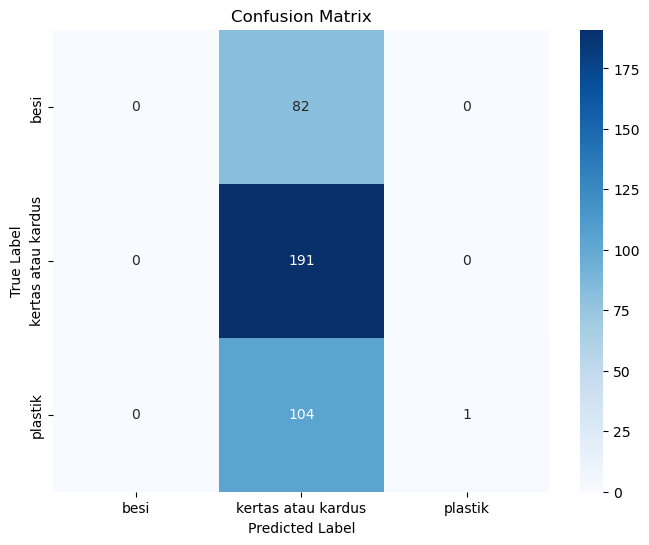

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=kategori, yticklabels=kategori)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Simpan model ke dalam file .pkl
joblib.dump(svm, 'model_svm_rbf_deteksitepi.pkl')


['model_svm_rbf_deteksitepi.pkl']

# KLASIFIKASI INPUT USER

In [23]:
import os  # Modul untuk berinteraksi dengan sistem operasi
import cv2  # Modul untuk pemrosesan gambar menggunakan OpenCV
import numpy as np  # Modul untuk operasi numerik
import joblib  # Modul untuk menyimpan dan memuat model

# Fungsi untuk mendapatkan label (indeks kelas) dari nama folder
def get_labels(categories):
    labels = {}
    for i, category in enumerate(categories):
        labels[category] = i
    return labels

# List kategori (nama folder)
categories = ['besi', 'kertas atau kardus', 'plastik']
labels = get_labels(categories)

# Memuat model SVM dan model PCA dari file
svm = joblib.load('model_svm_sampahbaru.pkl')
pca = joblib.load('model_pca_sampahbaru.pkl')

def select_image():
    while True:
        image_path = input("Enter the path of the image file: ")
        if os.path.isfile(image_path):
            return image_path
        else:
            print("Invalid file path. Please enter a valid path.")

def preprocess_image(image_path, target_shape):
    # Memuat gambar
    image = cv2.imread(image_path)
    # Mengubah ukuran gambar menjadi bentuk target
    resized_image = cv2.resize(image, target_shape)
    # Mengonversi gambar menjadi skala keabuan
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    # Mendeteksi tepi
    edges = cv2.Canny(gray, 50, 150)
    # Membalik tepi untuk mendapatkan latar belakang putih
    edges = cv2.bitwise_not(edges)
    # Mengonversi tepi menjadi gambar biner
    _, mask = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)
    # Mengaplikasikan masker ke gambar asli
    result = cv2.bitwise_and(resized_image, resized_image, mask=mask)
    return result

def predict_waste_category(image_path, model, pca_model, target_shape=(384, 512)):
    # Pra-pemrosesan gambar
    preprocessed_image = preprocess_image(image_path, target_shape)
    
    # Normalisasi gambar (rescale nilai piksel ke rentang [0, 1])
    normalized_image = preprocessed_image / 255.0
    
    # Terapkan PCA
    X = []
    for i in range(3):  # Merah, Hijau, Biru
        layer = normalized_image[:, :, i].flatten()
        X_layer_pca = pca_model.transform([layer])
        X.append(X_layer_pca)
    X_pca = np.hstack(X)
    
    # Prediksi kategori sampah
    prediction = model.predict(X_pca)
    predicted_category = categories[prediction[0]]
    return predicted_category

# Contoh penggunaan
image_path = select_image()
if image_path:
    predicted_category = predict_waste_category(image_path, svm, pca)
    if predicted_category:
        print("Predicted waste category:", predicted_category)
else:
    print("No image selected.")


Enter the path of the image file: /Users/ferdirj/Downloads/wesiyowesi.jpg
Predicted waste category: plastik


# Objek dectection

In [1]:
import os  # Modul untuk berinteraksi dengan sistem operasi
import cv2  # Modul untuk pemrosesan gambar menggunakan OpenCV
import numpy as np  # Modul untuk operasi numerik
import joblib  # Modul untuk menyimpan dan memuat model

# Fungsi untuk mendapatkan label (indeks kelas) dari nama folder
def get_labels(categories):
    labels = {}
    for i, category in enumerate(categories):
        labels[category] = i
    return labels

# List kategori (nama folder)
categories = ['besi', 'kertas atau kardus', 'plastik']
labels = get_labels(categories)

# Memuat model SVM dan model PCA dari file
svm = joblib.load('model_svm_sampahbaru.pkl')
pca = joblib.load('model_pca_sampahbaru.pkl')

# Fungsi untuk memilih gambar dari path yang diberikan
def select_image():
    while True:
        image_path = input("Enter the path of the image file: ")
        if os.path.isfile(image_path):
            return image_path
        else:
            print("Invalid file path. Please enter a valid path.")

# Fungsi untuk pra-pemrosesan gambar
def preprocess_image(image_path, target_shape):
    # Memuat gambar
    image = cv2.imread(image_path)
    # Mengubah ukuran gambar menjadi bentuk target
    resized_image = cv2.resize(image, target_shape)
    # Mengonversi gambar menjadi skala keabuan
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    # Mendeteksi tepi
    edges = cv2.Canny(gray, 50, 150)
    # Membalik tepi untuk mendapatkan latar belakang putih
    edges = cv2.bitwise_not(edges)
    # Mengonversi tepi menjadi gambar biner
    _, mask = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)
    # Mengaplikasikan masker ke gambar asli
    result = cv2.bitwise_and(resized_image, resized_image, mask=mask)
    return result

# Fungsi untuk mendeteksi objek dalam gambar dan menggambar kotak pembatas di sekitar mereka
def detect_objects(image_path, min_contour_area=500):
    # Memuat gambar
    image = cv2.imread(image_path)
    # Mengonversi gambar menjadi skala keabuan
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Mendeteksi tepi
    edges = cv2.Canny(gray, 50, 150)
    # Mencari kontur
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Menggambar kotak pembatas di sekitar objek yang terdeteksi
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_contour_area:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Menampilkan gambar dengan kotak pembatas
    cv2.imshow("Detected Objects", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Fungsi untuk memprediksi kategori sampah dari gambar dengan deteksi objek
def predict_waste_category_with_detection(image_path, model, pca_model):
    # Mendeteksi objek dalam gambar
    detect_objects(image_path)
    
    # Memprediksi kategori sampah
    predicted_category = predict_waste_category(image_path, model, pca_model)
    print("Predicted waste category:", predicted_category)

# Contoh penggunaan
image_path = select_image()
if image_path:
    predict_waste_category_with_detection(image_path, svm, pca)
else:
    print("No image selected.")

# Fungsi ini memungkinkan pengguna untuk memilih gambar dari path yang diberikan.
# Kemudian, fungsi `detect_objects` digunakan untuk mendeteksi objek dalam gambar dan menggambar kotak pembatas di sekitar mereka.
# Setelah deteksi objek, fungsi `predict_waste_category` dipanggil untuk memprediksi kategori sampah dari gambar.
# Hasil prediksi kemudian dicetak ke layar.


Enter the path of the image file: /Users/ferdirj/Downloads/plastik.jpg
Predicted waste category: kertas atau kardus


Enter the path of the image file: /Users/ferdirj/Downloads/plastik.jpg


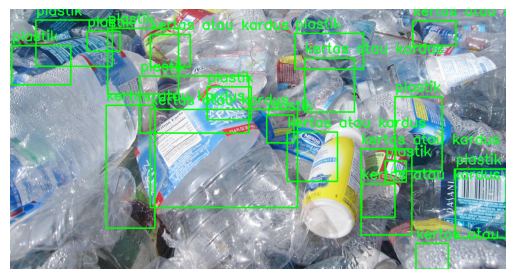

In [6]:
import os  # Modul untuk berinteraksi dengan sistem operasi
import cv2  # Modul untuk pemrosesan gambar menggunakan OpenCV
import numpy as np  # Modul untuk operasi numerik
import matplotlib.pyplot as plt  # Modul untuk plotting
import joblib  # Modul untuk menyimpan dan memuat model

# Fungsi untuk mendapatkan label (indeks kelas) dari nama folder
def get_labels(categories):
    labels = {}
    for i, category in enumerate(categories):
        labels[category] = i
    return labels

# List kategori (nama folder)
categories = ['besi', 'kertas atau kardus', 'plastik']
labels = get_labels(categories)

# Memuat model SVM dan model PCA dari file
svm = joblib.load('model_svm_sampahbaru.pkl')
pca = joblib.load('model_pca_sampahbaru.pkl')

# Fungsi untuk memilih gambar dari path yang diberikan
def select_image():
    while True:
        image_path = input("Enter the path of the image file: ")
        if os.path.isfile(image_path):
            return image_path
        else:
            print("Invalid file path. Please enter a valid path.")

# Fungsi untuk pra-pemrosesan gambar
def preprocess_image(image_path, target_shape):
    # Memuat gambar
    image = cv2.imread(image_path)
    # Mengubah ukuran gambar menjadi bentuk target
    resized_image = cv2.resize(image, target_shape)
    # Mengonversi gambar menjadi skala keabuan
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    # Mendeteksi tepi
    edges = cv2.Canny(gray, 50, 150)
    # Membalik tepi untuk mendapatkan latar belakang putih
    edges = cv2.bitwise_not(edges)
    # Mengonversi tepi menjadi gambar biner
    _, mask = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)
    # Mengaplikasikan masker ke gambar asli
    result = cv2.bitwise_and(resized_image, resized_image, mask=mask)
    return result

# Fungsi untuk mendeteksi objek dalam gambar dan mengembalikan kotak pembatas di sekitar mereka
def detect_objects(image_path, min_contour_area=500):
    # Memuat gambar
    image = cv2.imread(image_path)
    # Mengonversi gambar menjadi skala keabuan
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Mendeteksi tepi
    edges = cv2.Canny(gray, 50, 150)
    # Mencari kontur
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Inisialisasi list untuk kotak pembatas
    boxes = []
    # Menggambar kotak pembatas di sekitar objek yang terdeteksi
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_contour_area:
            x, y, w, h = cv2.boundingRect(contour)
            boxes.append((x, y, w, h))
    return boxes

# Fungsi untuk memprediksi kategori sampah dari gambar tanpa deteksi objek
def predict_waste_category(image_path, model, pca_model, target_shape=(384, 512)):
    # Pra-pemrosesan gambar
    preprocessed_image = preprocess_image(image_path, target_shape)
    
    # Normalisasi gambar (rescale nilai piksel ke rentang [0, 1])
    normalized_image = preprocessed_image / 255.0
    
    # Terapkan PCA
    X = []
    for i in range(3):  # Merah, Hijau, Biru
        layer = normalized_image[:, :, i].flatten()
        X_layer_pca = pca_model.transform([layer])
        X.append(X_layer_pca)
    X_pca = np.hstack(X)
    
    # Prediksi kategori sampah
    prediction = model.predict(X_pca)
    predicted_category = categories[prediction[0]]
    return predicted_category

# Fungsi untuk memprediksi kategori sampah dari gambar dengan deteksi objek
def predict_waste_category_with_detection(image_path, model, pca_model, target_shape=(384, 512)):
    # Deteksi objek dalam gambar
    boxes = detect_objects(image_path)

    # Memuat gambar
    image = cv2.imread(image_path)

    # Iterasi di atas kotak yang terdeteksi
    for (x, y, w, h) in boxes:
        # Memotong objek yang terdeteksi dari gambar
        cropped_image = image[y:y+h, x:x+w]
        
       



__________________________________________________________________________
__________________________________________________________________________
__________________________________________________________________________
__________________________________________________________________________
__________________________________________________________________________